In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
print(tf.__version__)

1.10.0


In [3]:
# 28x28 images of handwritten digits from 0-9

mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

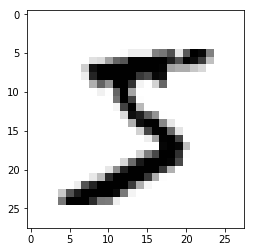

In [5]:
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.show()

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# without normalizing the data
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 79us/step - loss: 13.0300 - acc: 0.1909 - val_loss: 11.8917 - val_acc: 0.2622
Epoch 2/10
48000/48000 [==============================] - 3s 61us/step - loss: 11.8561 - acc: 0.2641 - val_loss: 11.5597 - val_acc: 0.2827
Epoch 3/10
48000/48000 [==============================] - 3s 60us/step - loss: 10.8628 - acc: 0.3256 - val_loss: 10.3939 - val_acc: 0.3549
Epoch 4/10
48000/48000 [==============================] - 3s 60us/step - loss: 10.6628 - acc: 0.3382 - val_loss: 11.7310 - val_acc: 0.2716
Epoch 5/10
48000/48000 [==============================] - 3s 63us/step - loss: 10.5534 - acc: 0.3450 - val_loss: 10.2901 - val_acc: 0.3612
Epoch 6/10
48000/48000 [==============================] - 3s 61us/step - loss: 10.4281 - acc: 0.3529 - val_loss: 10.1828 - val_acc: 0.3681
Epoch 7/10
48000/48000 [==============================] - 3s 62us/step - loss: 10.2095 - acc: 0.3665 - val_loss: 10.

In [8]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 20us/step
10.463097999572755 0.3507


In [9]:
# normalizing the data

X_train_norm = tf.keras.utils.normalize(X_train, axis=1)
X_test_norm = tf.keras.utils.normalize(X_test, axis=1)

In [10]:
# without normalizing the data
model.fit(X_train_norm, y_train, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 66us/step - loss: 0.3485 - acc: 0.8984 - val_loss: 0.1843 - val_acc: 0.9422
Epoch 2/10
48000/48000 [==============================] - 3s 63us/step - loss: 0.1571 - acc: 0.9523 - val_loss: 0.1447 - val_acc: 0.9562
Epoch 3/10
48000/48000 [==============================] - 3s 62us/step - loss: 0.1170 - acc: 0.9640 - val_loss: 0.1247 - val_acc: 0.9610
Epoch 4/10
48000/48000 [==============================] - 3s 62us/step - loss: 0.0912 - acc: 0.9729 - val_loss: 0.1219 - val_acc: 0.9623
Epoch 5/10
48000/48000 [==============================] - 3s 65us/step - loss: 0.0731 - acc: 0.9775 - val_loss: 0.1086 - val_acc: 0.9681
Epoch 6/10
48000/48000 [==============================] - 3s 64us/step - loss: 0.0580 - acc: 0.9825 - val_loss: 0.1140 - val_acc: 0.9668
Epoch 7/10
48000/48000 [==============================] - 3s 62us/step - loss: 0.0478 - acc: 0.9849 - val_loss: 0.1105 - val_acc

In [11]:
val_loss, val_acc = model.evaluate(X_test_norm, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 20us/step
0.11238913917505415 0.9713


In [12]:
# saving a model
model.save('number_reader.model')

In [13]:
# loading a model
loaded_model = tf.keras.models.load_model('number_reader.model')

In [14]:
# predictions takes as input a list
predictions = loaded_model.predict([X_test_norm])

In [15]:
print(predictions[:5])

[[6.1543541e-11 7.9574770e-11 3.3998059e-08 1.9680508e-08 1.1096164e-17
  9.0983942e-14 3.0158165e-22 1.0000000e+00 1.6593889e-10 1.5612537e-09]
 [7.3097615e-13 6.6272431e-04 9.9929595e-01 1.0573627e-08 1.1105302e-10
  3.9981762e-05 1.2819654e-06 1.1348364e-07 1.0741484e-09 7.3414229e-13]
 [4.0482564e-06 9.9980885e-01 1.5407553e-05 2.5513544e-05 1.9896031e-06
  2.2722240e-06 2.6634130e-05 4.4601053e-05 7.0104034e-05 7.3695958e-07]
 [9.9997973e-01 1.1274305e-10 2.3163532e-06 4.9258279e-08 1.4094569e-07
  8.3066652e-08 5.2885093e-06 8.2830400e-09 4.3387303e-07 1.1908058e-05]
 [2.5942349e-08 3.1450937e-09 1.7752656e-07 1.8867925e-09 9.9904197e-01
  1.0508535e-09 1.3771013e-09 1.3454223e-06 4.0315848e-07 9.5609162e-04]]


In [18]:
np.argmax(predictions[0])

7

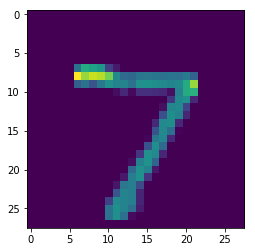

In [19]:
plt.imshow(X_test_norm[0])
plt.show()